In [1]:
import pickle
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
from util import LossFunction
from m_independent import * 
from m_dependent_d import *
import m_dependent_b as mib 
from m_encoder import *
from convex_network import * 

In [3]:
# Load a pickle file
with open('data/2024-10-13_PC1D_process10_data.pkl', 'rb') as f:
    data = pickle.load(f)
    
N = 10 
step = 50
e = torch.tensor(data['strain'][:N,::step], dtype=torch.float32)
e_dot = torch.tensor(data['strain_rate'][:N,::step], dtype=torch.float32)
s = torch.tensor(data['stress'][:N,::step], dtype=torch.float32)

E = torch.tensor(data['E'][:N], dtype=torch.float32)
nu = torch.tensor(data['nu'][:N], dtype=torch.float32)

loss_function = LossFunction() 

In [4]:
ae_E = AutoEncoder(E.shape[1], 10)
ae_E_optimizer = torch.optim.Adam(ae_E.parameters(), lr=1e-3)
ae_E_loss_history = []

num_epochs = 1000
for epoch in tqdm(range(num_epochs)):
    loss = train_step_ae(ae_E, ae_E_optimizer, E)
    ae_E_loss_history.append(loss)
    if (epoch+1) % 100 == 0:
        tqdm.write(f'AE E Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

  0%|          | 0/1000 [00:00<?, ?it/s]

AE E Epoch [100/1000], Loss: 0.0426
AE E Epoch [200/1000], Loss: 0.0174
AE E Epoch [300/1000], Loss: 0.0052
AE E Epoch [400/1000], Loss: 0.0023
AE E Epoch [500/1000], Loss: 0.0006
AE E Epoch [600/1000], Loss: 0.0001
AE E Epoch [700/1000], Loss: 0.0000
AE E Epoch [800/1000], Loss: 0.0000
AE E Epoch [900/1000], Loss: 0.0000
AE E Epoch [1000/1000], Loss: 0.0000


In [5]:
ae_nu = AutoEncoder(nu.shape[1], 10)
ae_nu_optimizer = torch.optim.Adam(ae_nu.parameters(), lr=1e-3)
ae_nu_loss_history = []
num_epochs = 1000
for epoch in tqdm(range(num_epochs)):
    loss = train_step_ae(ae_nu, ae_nu_optimizer, nu)
    ae_nu_loss_history.append(loss)
    if (epoch+1) % 100 == 0:
        print(f'AE Nu Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

  0%|          | 0/1000 [00:00<?, ?it/s]

AE Nu Epoch [100/1000], Loss: 0.0513
AE Nu Epoch [200/1000], Loss: 0.0226
AE Nu Epoch [300/1000], Loss: 0.0078
AE Nu Epoch [400/1000], Loss: 0.0021
AE Nu Epoch [500/1000], Loss: 0.0006
AE Nu Epoch [600/1000], Loss: 0.0001
AE Nu Epoch [700/1000], Loss: 0.0000
AE Nu Epoch [800/1000], Loss: 0.0000
AE Nu Epoch [900/1000], Loss: 0.0000
AE Nu Epoch [1000/1000], Loss: 0.0000


E reconstruction error: 0.0026354349683970213
nu reconstruction error: 0.00010621031833579764


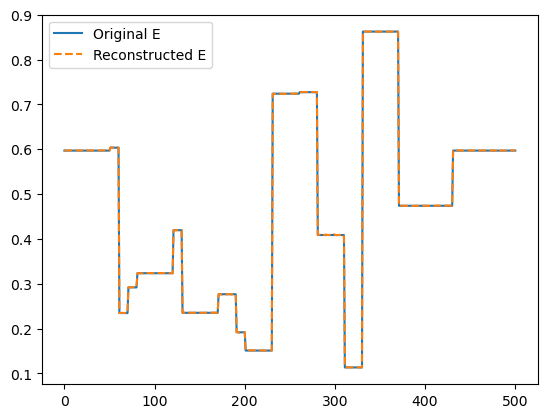

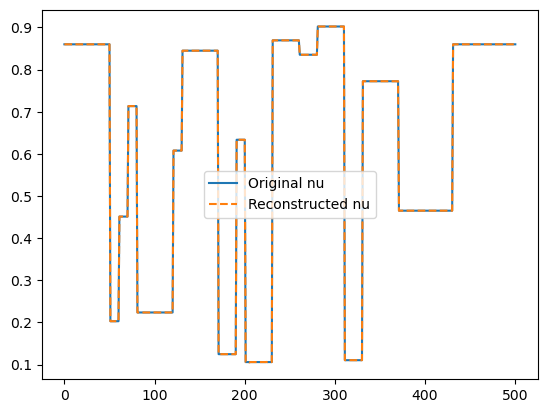

In [6]:
n = 8
E_recon = ae_E(E).detach().numpy()
nu_recon = ae_nu(nu).detach().numpy()
print("E reconstruction error:", loss_function.relative_error(torch.tensor(E_recon), E).item())
print("nu reconstruction error:", loss_function.relative_error(torch.tensor(nu_recon), nu).item())
plt.figure()
plt.plot(E.detach().numpy()[n], label='Original E')
plt.plot(E_recon[n], '--', label='Reconstructed E')
plt.legend()
plt.figure()
plt.plot(nu.detach().numpy()[n], label='Original nu')
plt.plot(nu_recon[n], '--', label='Reconstructed nu')
plt.legend()
plt.show()


In [7]:
vmm = ViscoelasticMaterialModel(2, 20, 2, 20)
optimizer = torch.optim.Adam(vmm.parameters(), lr=1e-3)
loss_history = []

In [8]:
num_epochs = 1000
for epoch in tqdm(range(num_epochs)):
    loss = train_step(vmm, optimizer, e, e_dot, s)
    loss_history.append(loss)
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')
        

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [100/1000], Loss: 0.0375
Epoch [200/1000], Loss: 0.0302
Epoch [300/1000], Loss: 0.0268
Epoch [400/1000], Loss: 0.0248
Epoch [500/1000], Loss: 0.0238
Epoch [600/1000], Loss: 0.0231
Epoch [700/1000], Loss: 0.0227
Epoch [800/1000], Loss: 0.0224
Epoch [900/1000], Loss: 0.0221
Epoch [1000/1000], Loss: 0.0218


Training completed.
Training Relative Error: 0.1738


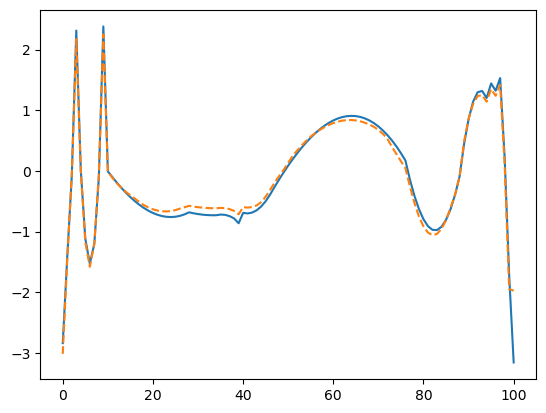

In [9]:
n = 3
print("Training completed.")
s_pred, xi = vmm(e, e_dot)
train_error = loss_function.relative_error(s_pred, s).item()
print(f'Training Relative Error: {train_error:.4f}')
plt.figure()
plt.plot(s.detach().numpy()[n], label='True Stress')
plt.plot(s_pred.detach().numpy()[n], '--', label='Predicted Stress')

In [13]:
vmm_m = ViscoelasticMaterialModelM(22, 20, 22, 20, ae_E.encoder, ae_nu.encoder)
optimizer_m = torch.optim.Adam(vmm_m.parameters(), lr=1e-3)
loss_history_m = []

/var/folders/sw/6bcl4ngj0x77mrv5p1s62_k00000gn/T/ipykernel_35636/463625678.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu1  = torch.tensor(E[n].clone(), dtype=torch.float32).unsqueeze(0).repeat(X.shape[0], 1)
/var/folders/sw/6bcl4ngj0x77mrv5p1s62_k00000gn/T/ipykernel_35636/463625678.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu2 = torch.tensor(nu[n].clone(), dtype=torch.float32).unsqueeze(0).repeat(X.shape[0], 1)


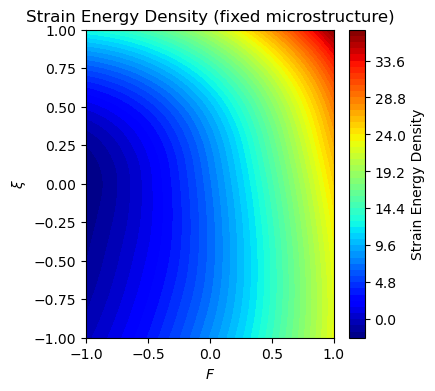

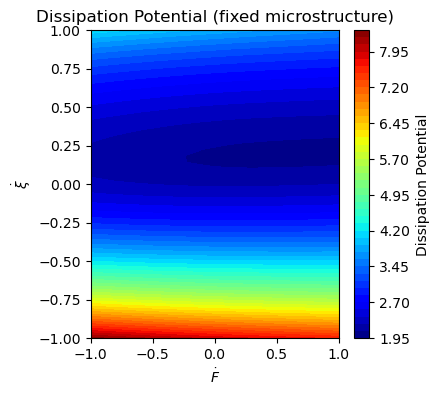

In [14]:
n = 1
x = torch.linspace(-1, 1, 50)
y = torch.linspace(-1, 1, 50)
X, Y = torch.meshgrid(x, y, indexing='ij')
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)
mu1  = torch.tensor(E[n].clone(), dtype=torch.float32).unsqueeze(0).repeat(X.shape[0], 1)
mu2 = torch.tensor(nu[n].clone(), dtype=torch.float32).unsqueeze(0).repeat(X.shape[0], 1)
energy = vmm_m.energy_function(X, Y, mu1, mu2)

dissipation = vmm_m.dissipation_potential(X, Y, mu1, mu2)
X = X.detach().reshape(50, 50)
Y = Y.detach().reshape(50, 50)
energy = energy.detach().numpy().reshape(50, 50)
plt.figure(figsize=(4,4))
plt.contourf(X, Y, energy, levels=50, cmap='jet')
plt.colorbar(label='Strain Energy Density')
plt.xlabel(r'$F$')
plt.ylabel(r'$\xi$')
plt.title('Strain Energy Density (fixed microstructure)')
plt.show()

dissipation = dissipation.detach().numpy().reshape(50, 50)
plt.figure(figsize=(4,4))
plt.contourf(X, Y, dissipation, levels=50, cmap='jet')
plt.colorbar(label='Dissipation Potential')
plt.xlabel(r'$\dot{F}$')
plt.ylabel(r'$\dot{\xi}$')
plt.title('Dissipation Potential (fixed microstructure)')
plt.show()


In [15]:
epochs = 2000
for epoch in tqdm(range(epochs)):
    loss = train_step_M(vmm_m, optimizer_m, e, e_dot, E, nu, s)
    loss_history_m.append(loss)
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.4f}')

  0%|          | 0/2000 [00:00<?, ?it/s]

Epoch [100/2000], Loss: nan


KeyboardInterrupt: 

/var/folders/sw/6bcl4ngj0x77mrv5p1s62_k00000gn/T/ipykernel_35271/442665299.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu1  = torch.tensor(E[n].clone(), dtype=torch.float32).unsqueeze(0).repeat(X.shape[0], 1)
/var/folders/sw/6bcl4ngj0x77mrv5p1s62_k00000gn/T/ipykernel_35271/442665299.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu2 = torch.tensor(nu[n].clone(), dtype=torch.float32).unsqueeze(0).repeat(X.shape[0], 1)


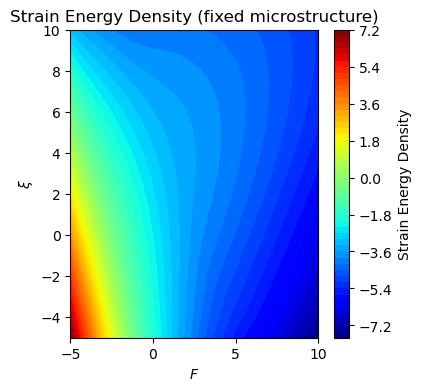

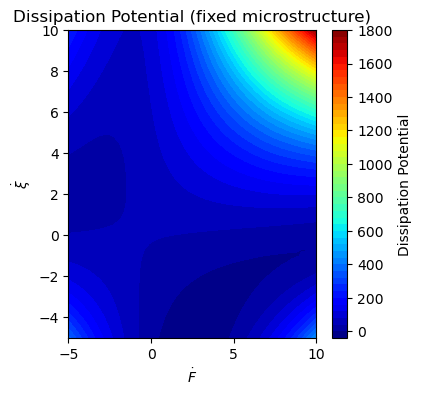

In [11]:
n = 1
x = torch.linspace(-5, 10, 50)
y = torch.linspace(-5, 10, 50)
X, Y = torch.meshgrid(x, y, indexing='ij')
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)
mu1  = torch.tensor(E[n].clone(), dtype=torch.float32).unsqueeze(0).repeat(X.shape[0], 1)
mu2 = torch.tensor(nu[n].clone(), dtype=torch.float32).unsqueeze(0).repeat(X.shape[0], 1)
energy = vmm_m.energy_function(X, Y, mu1, mu2)

dissipation = vmm_m.dissipation_potential(X, Y, mu1, mu2)
X = X.detach().reshape(50, 50)
Y = Y.detach().reshape(50, 50)
energy = energy.detach().numpy().reshape(50, 50)
plt.figure(figsize=(4,4))
plt.contourf(X, Y, energy, levels=50, cmap='jet')
plt.colorbar(label='Strain Energy Density')
plt.xlabel(r'$F$')
plt.ylabel(r'$\xi$')
plt.title('Strain Energy Density (fixed microstructure)')
plt.show()

dissipation = dissipation.detach().numpy().reshape(50, 50)
plt.figure(figsize=(4,4))
plt.contourf(X, Y, dissipation, levels=50, cmap='jet')
plt.colorbar(label='Dissipation Potential')
plt.xlabel(r'$\dot{F}$')
plt.ylabel(r'$\dot{\xi}$')
plt.title('Dissipation Potential (fixed microstructure)')
plt.show()





In [66]:
dissipation.shape

(50, 50)

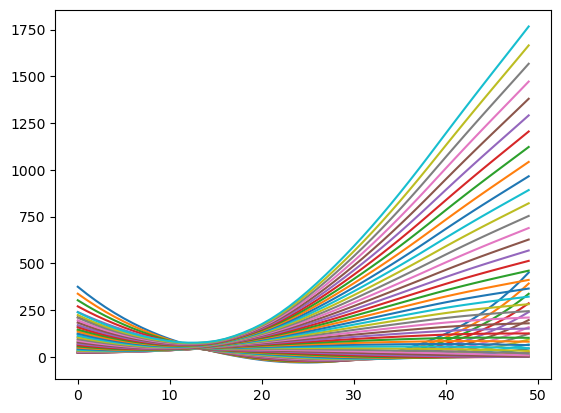

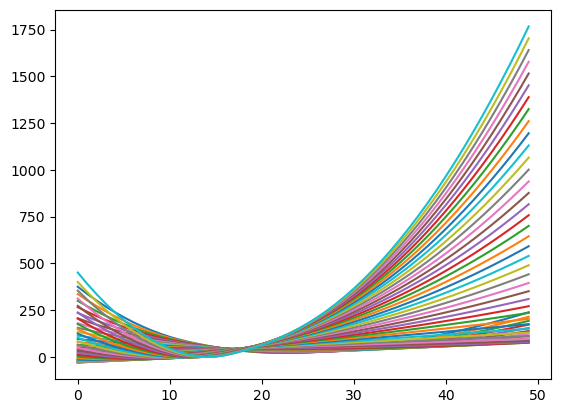

In [12]:
# plt.plot(dissipation[0])
plt.plot(dissipation)
plt.show()

plt.plot(dissipation.T)
plt.show()

Training Relative Error with Microstructure: 0.0526


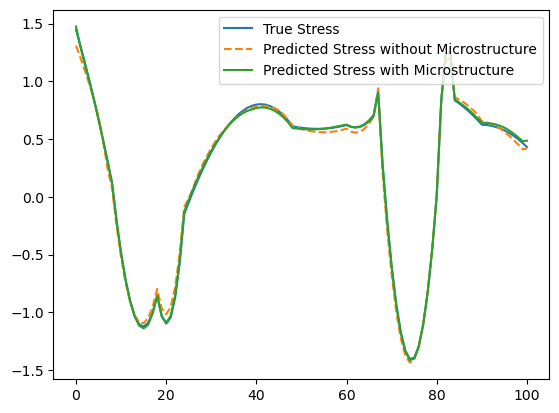

In [16]:
i = 9
plt.plot(s[i,:,0].detach().numpy(), label='True Stress')
s_pred_m, xi_m = vmm_m(e, e_dot, E, nu)
plt.plot(s_pred[i,:,0].detach().numpy(), '--', label='Predicted Stress without Microstructure')
plt.plot(s_pred_m[i,:,0].detach().numpy(), label='Predicted Stress with Microstructure')
plt.legend()
train_error_m = loss_function.relative_error(s_pred_m, s).item()
print(f'Training Relative Error with Microstructure: {train_error_m:.4f}')